# README

This project was created by Thu Nguyen, Tien Nguyen, Hop Le, and Minh Tran under the supervision of 2 mentors Canh Nguyen and Toan Vong in the summer camp PiMA (Projects in Mathematics and Applications) 2024. We devloped this machine learning model using Support Vector Machine algorithm as a supplement to our final academic report on our study of Linear Programming for Data Science. The final report was written in Vietnamese and can be found [here](https://drive.google.com/file/d/1mrxSXi9C2SUUFXM75vKSBqX9LuWi9C7y/view?usp=sharing).

We used the Support Vector Machine algorithm to train a machine learning model to classify between the handwritten characters 0 and 1 in the MNIST dataset. However, we did not use the pre-built SVM module. We developed the SVM algorithm from an original Linear Programming problem instead to show and understand more deeply the beauty of mathematics and the great applications of Linear Programming.

# Preprocessing Data

Importing MNIST dataset

In [ ]:
from keras.datasets import mnist
(data_train, label_train), (data_test, label_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp

Filter dataset with label of "0" and "1" from mnist

In [ ]:
filter_mask_train = np.isin(label_train, [0, 1]) # filter out other numbers and keep only 0s & 1s
filtered_data_train = data_train[filter_mask_train]
filtered_label_train = label_train[filter_mask_train]
filtered_label_train = filtered_label_train.astype(int) # change the datatype of label_train from unit8 to int so it will convert to -1 not 255
for i in range(filtered_label_train.shape[0]): # replace value: 1 -> 1, 0 -> -1 so it will align with the SVM algorithm
  if filtered_label_train[i] == 0:
    filtered_label_train[i] = -1

# do the same things with data_test
filter_mask_test = np.isin(label_test, [0,1])
filtered_data_test = data_test[filter_mask_test]
filtered_label_test = label_test[filter_mask_test]
filtered_label_test = filtered_label_test.astype(int)
for i in range(filtered_label_test.shape[0]):
  if filtered_label_test[i] == 0:
    filtered_label_test[i] = -1
print(filtered_label_train)

[-1  1  1 ...  1 -1  1]


Show data (some handwritten character images) using Matplotlib



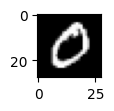

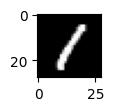

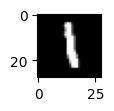

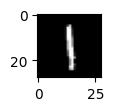

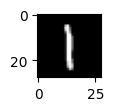

In [ ]:
from matplotlib import pyplot

for i in range(5):
  pyplot.subplot(5,1,i+1)
  pyplot.imshow(filtered_data_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

# Support Vector Machine Algorithm using L-1 norm Linear Programming:

Find $w_j,t_j,w_0$ so that:

Minimize $t_1 + t_2 + ... + t_d$ \\
Subject to:
*   $-t_j \le w_j \le t_j$  $(j = 1,2,...d)$
*   $y_i(w^Tx_i+w_0) \ge 1$  $(i = 1,2,...n)$

---

Orginal linear programming problem: \\
Minimize $c^Tx$
Subject to:
*   $A_1x \le b_1$ (inequal constraint)
*   $A_2x = b_2$ (equal constraint)
*   $a \le x \le b$ (bounds)


---

`linprog` will take in parameters: `linprog(cT,A_1,b_1,A_2,b_2,bounds)`

In [ ]:
from scipy.optimize import linprog
d = 28*28 # number of pixel in an image
n = filtered_data_train.shape[0] # number of image in the dataset

Our variable $x$ is a vector containing:
*   $t_j = [t_1,t_2,...,t_d]$
*   $w_j = [w_1,w_2,...,w_d]$
*   $w_0 = constant$

Our objective equation can be rewritten as:

Minimize $t_1+t_2+...+td ↔$ Minimize $t_1+t_2+...+t_d+0w_1+0w_2+...+0w_d+0w_0$

$→ c^T = [1,1,...,1,0,0,...,0,0]$

There are: $d$ number 1's and $d+1$ number 0's









In [ ]:
c = np.concatenate((np.ones(d), np.zeros(d+1)))
c

array([1., 1., 1., ..., 0., 0., 0.])

Our constraints are:
*   $-t_j \le w_j \le t_j$  $(j = 1,2,...d)$
*   $y_i(w^Tx_i+w_0) \ge 1$  $(i = 1,2,...n)$

Which can be rewritten as:
*   $-t_j - w_j \le 0$  $(j=1,2,...d)$
*   $-t_j + w_j \le 0$  $(j=1,2,...d)$
*   $-x_{i,1}y_iw_1-x_{i,2}y_iw_2-...-x_{i,d}y_iw_d-y_iw_0 \le -1$

Note:
*   $x_{i,d} \in [0,255]$ (because $x$ represents the pixels)
*   $y_i \in \{1,-1\}$ (because $y$ represents the labels used to differentiate the number 0 and the number 1)







We divide the vector $A$ into 3 parts: $A_1,A_2,A_3$ corresponding to the 3 constraints



$A_1$ corresponding to the left-hand side of the equation: $-t_j - w_j \le 0$  $(j=1,2,...d)$

In [ ]:
A1 = np.concatenate((-np.identity(d), -np.identity(d), np.zeros((d, 1))), axis=1)
print(A1.shape)
print(A1)

(784, 1569)
[[-1. -0. -0. ... -0. -0.  0.]
 [-0. -1. -0. ... -0. -0.  0.]
 [-0. -0. -1. ... -0. -0.  0.]
 ...
 [-0. -0. -0. ... -0. -0.  0.]
 [-0. -0. -0. ... -1. -0.  0.]
 [-0. -0. -0. ... -0. -1.  0.]]


$A_2$ corresponding to the left-hand side of the equation: $-t_j + w_j \le 0$  $(j=1,2,...d)$

In [ ]:
A2 = np.concatenate((-np.identity(d),np.identity(d),np.zeros((d, 1))),axis=1)
print(A2.shape)
print(A2)

(784, 1569)
[[-1. -0. -0. ...  0.  0.  0.]
 [-0. -1. -0. ...  0.  0.  0.]
 [-0. -0. -1. ...  0.  0.  0.]
 ...
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  1.  0.  0.]
 [-0. -0. -0. ...  0.  1.  0.]]


$A_3$ corresponding to the left-hand side of the equation: $-x_{i,1}y_iw_1-x_{i,2}y_iw_2-...-x_{i,d}y_iw_d-y_iw_0 \le -1$

In [ ]:
A3 = np.concatenate((
    np.zeros((n, d)),
    -filtered_label_train.reshape((-1, 1)) * filtered_data_train.reshape((-1, d)), #-y * x
    -filtered_label_train.reshape((-1, 1))
), axis=1)
print(A3.shape)
print(A3)

(12665, 1569)
[[ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 ...
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


Vector $A$ is the result of the concatenation of $A_1,A_2,A_3$

In [ ]:
A = np.concatenate((A1, A2, A3), axis=0)
print(A.shape)
print(A)

(14233, 1569)
[[-1. -0. -0. ... -0. -0.  0.]
 [-0. -1. -0. ... -0. -0.  0.]
 [-0. -0. -1. ... -0. -0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


Vector $b$ is the right-hand side of the constraints: $0,0,-1$

$→$ vector $b$ is a $1$x$(2d+n)$ vector consisting of:

*  Two $1$x$d$ vectors $0's$
*  One $1$x$n$ vector $-1's$



In [ ]:
b = np.concatenate((
    np.zeros((2*d,1)),
    -np.ones((n,1))
), axis=0)
print(b)

[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [-1.]
 [-1.]
 [-1.]]


Define our bounds (None):

In [ ]:
# There is no bounds in our problem
bounds = [
    (None, None)
    for i in range(len(c))
]

Print our the result using `linprog` method from `scipy.optimize`

In [ ]:
result = linprog(
    c=c,
    A_ub=A,
    b_ub=b,
    A_eq=None, # There is no equal constraint in our problem
    b_eq=None,
    bounds=bounds
)
print(f"Result = {result}")

Result =         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 0.10681209043802584
              x: [-0.000e+00 -0.000e+00 ... -0.000e+00  1.290e+00]
            nit: 11444
          lower:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00 ...  3.293e+00
                              3.452e+00]
                 marginals: [-5.000e-01 -5.000e-01 ... -0.000e+00
                             -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.

Our result consists of:
*   From $0$ to $d-1$: $$t_j
*   From $d$ to $2d-1$: $w_j$
*   At $2d$: $w_0$

In [ ]:
answer = result.x # save the result into answer variable
# answer_t  = answer[0:d] # t is not used in finding our desired line (y = w * x + w0)
answer_w  = answer[d:2*d]
answer_w0 = answer[2*d]
print(f"wj={answer_w}")
print(f"w0={answer_w0}")
#for i in range(d):
 # print(answer_w[i])
#print(answer_w0)

wj=[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00

Test the our result and print the correction rate:

In [ ]:
filtered_data_test = filtered_data_test.reshape((-1, d))
predict = filtered_data_test @ answer_w + answer_w0
print("Number of correct prediction is",sum(predict*filtered_label_test > 0),"out of",filtered_data_test.shape[0])
percent = (sum(predict*filtered_label_test > 0) / filtered_data_test.shape[0])*100
print("The rate of correct prediction is:",percent)
print(f"wft = {filtered_data_test @ answer_w}")

Number of correct prediction is 2113 out of 2115
The rate of correct prediction is: 99.90543735224587
wft = [ 1.05969726 -6.56457371  1.29734361 ...  2.46204438 -6.35172284
  1.99549751]
